**Portfolio Optimization Model **

In this study, we will build two 10,000 TL investment portfolios containing four stocks in Turkish Market which are Tüpraş, Erdemir, Sabancı Holding and Turk Hava Yolları. 

We used past data of those stocks date between 01.01.2021 to 19.01.2023. We got this data from Yahoo Finance.

Our model includes and works following steps:

The first portfolio will have an equal weighting between the stocks. 
The second portfolio will be optimized with a weighting allocation that provides the best return, adjusted for risk. To build these two portfolios, we will:

Build the initial portfolio with equal weighting to each of the stocks
Analyze and visualize the equal-weighted portfolio. After that, we are going to generate 10,000 portfolio scenarios with random weighting to each of the stocks. At the final step, our model will identify the optimal portfolio from the scenarios and visualize the results.

In [18]:
pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# We imported the packages needed for this study.
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt 
import yfinance as yf
%matplotlib inline

In [21]:
# Then to identify the periods: we set start and end date parameters.
startdate = '2021-01-01'
enddate = '2023-01-19'
stocks = {}

# We create the list the four stock ticker symbols for our portfolio.
stock_list = ['TUPRS.IS', 'EREGL.IS', 'SAHOL.IS', 'THYAO.IS']

for i_stock in stock_list:
    stocks[i_stock]=yf.download(i_stock, start=startdate, end=enddate)[['Adj Close']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Creating the Equal-Weighted Portfolio**

To create the equal-weighted portfolio, we add some additional columns to the DataFrames in the stocks dictionary. The three columns that we will build are:

Normalized Return = Adjusted Close / Adjusted Close on the startdate of the portfolio
Allocation = Normalized Return * 0.25 (equal weighting for each of the four stocks)
Position Value = Allocation * 10,000 (value of the portfolio)

In [23]:
# We create the 'Normalized Return' column for each stock.
for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close # Divide each row by the first Adj Close

<ipython-input-23-7dbe819e52db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close # Divide each row by the first Adj Close


In [24]:
# Then for the allocation for each stock - equally weighted in our initial portfolio:
# We multiplied that 0.25 for this purpose.
for stock_name, stock_data in stocks.items():
    stock_data['Allocation'] = stock_data['Normalized Return'] * 0.25

<ipython-input-24-9cb3f128c452>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Allocation'] = stock_data['Normalized Return'] * 0.25


In [25]:
#To check the data:
stocks['TUPRS.IS'].head()

,Adj Close,Normalized Return,Allocation
Date,,,
2020-12-31 00:00:00+03:00,108.699997,1.000000,0.25000
2021-01-04 00:00:00+03:00,109.699997,1.009200,0.25230
2021-01-05 00:00:00+03:00,110.900002,1.020239,0.25506
2021-01-06 00:00:00+03:00,111.900002,1.029439,0.25736
2021-01-07 00:00:00+03:00,111.500000,1.025759,0.25644


In [34]:
# Then we set the value of the portfolio to 10.000 TL
for stock_name, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 10000

<ipython-input-34-321c6d1bbeb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Position Value'] = stock_data['Allocation'] * 10000


In [35]:
#To check the data with latest modification:
stocks['SAHOL.IS'].head()

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2020-12-31 00:00:00+03:00,10.711287,1.000000,0.250000,2500.000000
2021-01-04 00:00:00+03:00,10.821807,1.010318,0.252580,2525.795080
2021-01-05 00:00:00+03:00,10.656026,0.994841,0.248710,2487.102015
2021-01-06 00:00:00+03:00,10.609977,0.990542,0.247635,2476.354213
2021-01-07 00:00:00+03:00,10.702077,0.999140,0.249785,2497.850262


**Visualize the Portfolio Performance**

To visualize the performance of the portfolio, we can create two line charts that show the return of the portfolio, and the return of the individual stocks, over given time period.

We build a new DataFrame that contains the position value for each stock, as well as the total value for the portfolio. 

We use this DataFrame to create the two visuals.

In [37]:
# To create position_values dictionary:
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']


In [38]:
# To apply the model properly, we convert the position_values dictionary to a DataFrame:
position_values = pd.DataFrame(data=position_values)

position_values.head()

,TUPRS.IS,EREGL.IS,SAHOL.IS,THYAO.IS
Date,,,,
2020-12-31 00:00:00+03:00,2500.000000,2500.000000,2500.000000,2500.000000
2021-01-04 00:00:00+03:00,2522.999081,2469.959795,2525.795080,2434.715795
2021-01-05 00:00:00+03:00,2550.598083,2403.204198,2487.102015,2415.514493
2021-01-06 00:00:00+03:00,2573.597163,2448.264401,2476.354213,2434.715795
2021-01-07 00:00:00+03:00,2564.397496,2434.913199,2497.850262,2434.715795


In [39]:
# To see the addition of all, we add 'Total' column to position values, summing the other columns:
position_values['Total'] = position_values.sum(axis=1)

In [40]:
position_values.head()

,TUPRS.IS,EREGL.IS,SAHOL.IS,THYAO.IS,Total
Date,,,,,
2020-12-31 00:00:00+03:00,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2021-01-04 00:00:00+03:00,2522.999081,2469.959795,2525.795080,2434.715795,9953.469751
2021-01-05 00:00:00+03:00,2550.598083,2403.204198,2487.102015,2415.514493,9856.418788
2021-01-06 00:00:00+03:00,2573.597163,2448.264401,2476.354213,2434.715795,9932.931573
2021-01-07 00:00:00+03:00,2564.397496,2434.913199,2497.850262,2434.715795,9931.876752


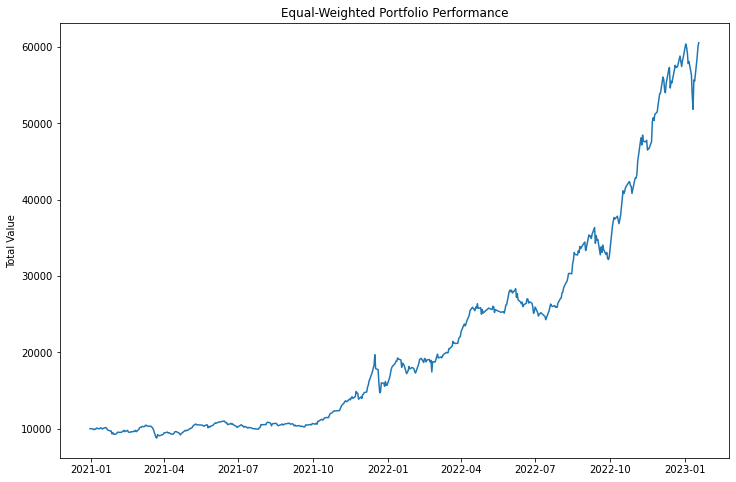

In [33]:
# To see our equal-weighted portfolio performance our specified period, we plot the graph to view the total portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values['Total'])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value');

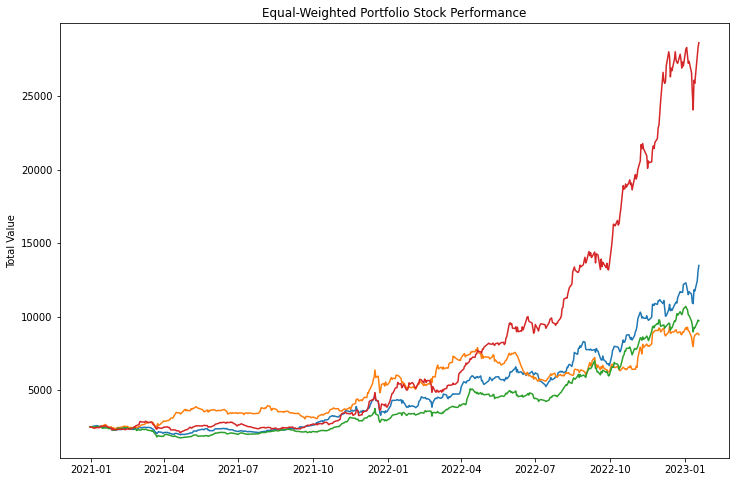

In [41]:
# To see our each stocks performance and analyze the each performance, we go as follows: to view the four stocks in the portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values.iloc[:,0:4])

plt.title('Equal-Weighted Portfolio Stock Performance')
plt.ylabel('Total Value');

**Calculating Performance Metrics for our Portfolio Analysis**

Until now, we have created and visualized the equal-weighted portfolio.

To make the the analysis and the optimization properly, we select and calculate a few metrics to detailed measure the performance of the portfolio. 

We created five performances metrics as follows:

*   Cumulative Return
*   Mean Daily Return
*   Standard Deviation Daily Return
*   Sharpe Ratio
*   Annualized Sharpe Ratio


In [43]:
# We start with the Cumulative Return analysis, to apply this we make the following calculations:
# First, we define the end and start value of the portfolio
end_value = position_values['Total'][-1]
start_value = position_values['Total'][0]

# Then, we calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print(str(round(cumulative_return*100,2)), '%')

505.94 %


From this, over the selected period of time, cumulative return of the portfolio is 505.94%. 

In [45]:
# For the daily return analysis, we start to create a 'Daily Returns' column
position_values['Daily Return'] = position_values['Total'].pct_change()

position_values.head()

,TUPRS.IS,EREGL.IS,SAHOL.IS,THYAO.IS,Total,Daily Return
Date,,,,,,
2020-12-31 00:00:00+03:00,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2021-01-04 00:00:00+03:00,2522.999081,2469.959795,2525.795080,2434.715795,9953.469751,-0.004653
2021-01-05 00:00:00+03:00,2550.598083,2403.204198,2487.102015,2415.514493,9856.418788,-0.009750
2021-01-06 00:00:00+03:00,2573.597163,2448.264401,2476.354213,2434.715795,9932.931573,0.007763
2021-01-07 00:00:00+03:00,2564.397496,2434.913199,2497.850262,2434.715795,9931.876752,-0.000106


In [46]:
# Then we calculate the mean Daily Return 
mean_daily_return = position_values['Daily Return'].mean()

print('The mean daily return is:', str(round(mean_daily_return, 4)))

The mean daily return is: 0.0037


In [47]:
# Then we calculate the standard deviation of Daily Return 
std_daily_return = position_values['Daily Return'].std()

print('The std daily return is:', str(round(std_daily_return, 4)))

The std daily return is: 0.0218


**Sharpe Ratio**

In this part, we are going to explore a risk-adjusted return metric called the sharpe ratio. 

The sharpe ratio helps us quantify how much return we are getting by a given level of risk. When comparing two different investments against the same benchmark, the asset with the higher Sharpe ratio provides a higher return for the same amount of risk or the same return for a lower risk than the other asset. 

The calculation is doing by the average return of the portfolio minus a risk free rate (such as government bonds), divided by the standard deviation of the return. 

To analyze properly, we will assume the risk-free rate is close to zero, so that we will not add it to the formula.

In [48]:
# We start with calculation of the Sharpe Ratio
sharpe_ratio = mean_daily_return / std_daily_return

sharpe_ratio

0.17208934875818685

In [50]:
# Then, we annualized sharpe ratio, to make proper analysis without any time period problems.
sharpe_ratio_annualized = sharpe_ratio * 252**0.5

sharpe_ratio_annualized

2.7318337205833467

** Optimization Starts: Preparing Scenarios to Optimize Portfolio Weighting**

We would like to prepare our data ahead of generating our scenarios to optimize the portfolio weighting. To do so, we will:



*   First, we create a dictionary containing the adjusted close for each of our stocks, named: stock_adj_close

*  Then, we create another dictionary that transforms the adjusted close for each day to a percent change from the previous day. 





In [51]:
# To, create stock_adj_close dictionary
stock_adj_close = {}

for stock_name, stock_data in stocks.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']

In [52]:
# Then,  we convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data=stock_adj_close)

stock_adj_close.head()

,TUPRS.IS,EREGL.IS,SAHOL.IS,THYAO.IS
Date,,,,
2020-12-31 00:00:00+03:00,108.699997,11.563778,10.711287,13.02
2021-01-04 00:00:00+03:00,109.699997,11.424827,10.821807,12.68
2021-01-05 00:00:00+03:00,110.900002,11.116048,10.656026,12.58
2021-01-06 00:00:00+03:00,111.900002,11.324474,10.609977,12.68
2021-01-07 00:00:00+03:00,111.500000,11.262718,10.702077,12.68


In [53]:
# we generate stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.head()

,TUPRS.IS,EREGL.IS,SAHOL.IS,THYAO.IS
Date,,,,
2020-12-31 00:00:00+03:00,NaN,NaN,NaN,NaN
2021-01-04 00:00:00+03:00,0.009200,-0.012016,0.010318,-0.026114
2021-01-05 00:00:00+03:00,0.010939,-0.027027,-0.015319,-0.007886
2021-01-06 00:00:00+03:00,0.009017,0.018750,-0.004321,0.007949
2021-01-07 00:00:00+03:00,-0.003575,-0.005453,0.008681,0.000000


**Testing Part: Build & Run 10,000 Portfolio Scenarios**

Until now, we've prepared our data, we're about to run our scenarios. 

To do this, first, we need to build the structures required to generate these scenarios and store the output. For this purpose, we are going to use `numpy.zeros()` function. 

This function creates arrays that are filled with zeros. After we run the scenarios, we replace these zeros with the corresponding final product. 

The reason we create the arrays with zeros first is to give our arrays the correct shape before we replace them with the correct values.

There will be four different arrays that we create, as follows:
 * weights_array - this array will have 10,000 rows and 4 columns and hold the weighting allocation for each stock
 * returns_array - this array will contain the portfolio return for each scenario
 * volatility_array - this array will contain the portfolio volatility for each scenario
 * sharpe_array - this array will contain the sharpe ratio for each scenario

In [54]:
# We start with defining the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [55]:
# Then the additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [59]:
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios): 
    # 1-) We generate four random numbers for each index
    numbers = np.array(np.random.random(4))
    
    # 2-) then divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # 3-) Save the weights in weights_array
    weights_array[index,:] = weights
    
    # 4-) We calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    # 5-) We calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # 6-) We calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [57]:
print("The first combination:", weights_array[0])

The first combination: [0.26728964 0.34364796 0.14116943 0.24789297]


In [58]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 2.6399602267007096


**Finding the Optimal Portfolio: Highest Sharpe Ratio**

So far, we have the output for all 10,000 scenarios. 

We would like to identify the optimal portfolio. 

The optimal portfolio in this model is the portfolio that has the highest sharpe ratio.

In [61]:
# We can find the highest sharpe ratio in sharpe_array
sharpe_array.max()

2.9733846083881166

In [62]:
# then we can find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

8535

In [65]:
# OPTIMAL WEIGHTS: To see the optimal weights for each stock
print(stock_list)
print(weights_array[index_max_sharpe,:])

['TUPRS.IS', 'EREGL.IS', 'SAHOL.IS', 'THYAO.IS']
[0.27218805 0.04094621 0.00707958 0.67978617]


The portfolio that has the highest sharpe ratio (2.97) and at the index of 8535.

We can see that the optimal weights for each stocks for the optimal portfolio is giving at Optimal Weights part above.

**Visualizing the Optimal Portfolio and the Portfolio Scenarios**

In this part, we are going to visualize our portfolio scenarios by using a scatter chart.

We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. 

As a last step, we can see on the graph where the optimal portfolio appears among all of the scenarios.

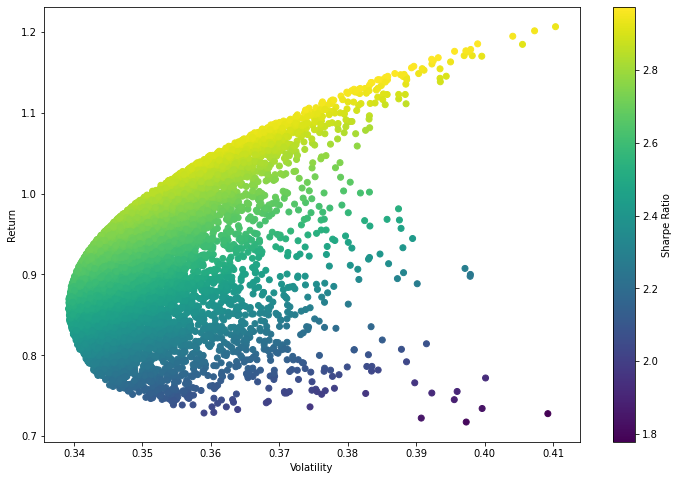

In [66]:
# To, visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

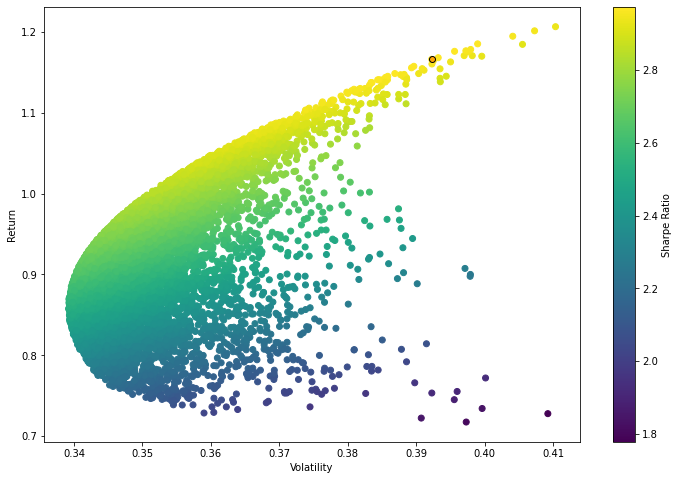

In [68]:
# We want to identify the optimal portfolio in the returns and volatility arrays, to do so:
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Then, visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# At last, we add the optimal portfolio to the visual on orange color (orange dot)
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolors='black');